# VIRAT DATASET - OBJECT VISUALIZATION

Show numbers of object per object_id

|Column| Type |Comment|
|---|:------|:--------|
|1| Object id|a unique identifier of an object track. Unique within a file.|
|2| Object duration | duration of the object track|
|3| Currnet frame|corresponding frame number|
|4| bbox lefttop x|horizontal x coordinate of the left top of bbox, origin is lefttop of the frame|
|5| bbox lefttop y|vertical y coordinate of the left top of bbox, origin is lefttop of the frame|
|6| bbox width|horizontal width of the bbox|
|7| bbox height|vertical height of the bbox|
|8| Object Type|object type|

Object Type ID (for column 8 above for object files)

ID | Type|
---|:----|
1| person
2| car              (usually passenger vehicles such as sedan, truck)
3| vehicles         (vehicles other than usual passenger cars. Examples include construction vehicles)
4| object           (neither car or person, usually carried objects)
5| bike, bicylces   (may include engine-powered auto-bikes)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

object_anno_fields     = ['object_id', 'object_duration', 'current_frame','left_top_x','left_top_y', 'width', 'height', 'object_type']
DEFAULT_ANNOTATION_DIR = './annotations'

In [5]:
# Find all the object annotation files
all_object_annotation_paths = []
for root, dirs, files in os.walk(DEFAULT_ANNOTATION_DIR):
    for f in files:
        if f.endswith('.viratdata.objects.txt'):
            fpath =  os.path.join(DEFAULT_ANNOTATION_DIR, f)
            all_object_annotation_paths.append(fpath)
            
frames = []
prev_idx = 0
for idx, path in enumerate(all_object_annotation_paths):
    annotation_file = pd.read_csv(path, delim_whitespace=True, names=object_anno_fields)
    # Intentionally created new object id to count total number of annotated objects
    annotation_file['object_id'] += idx
    annotation_file['object_id'] += prev_idx
    prev_idx = np.max(annotation_file['object_id'].values)    
    frames.append(annotation_file)

df = pd.concat(frames)

print 'Number of data points: %s'%len(df)
print 'Number of annotated object: %s'%df['object_id'].nunique()

Number of data points: 9822777
Number of annotated object: 11833


In [19]:
df1 = df.groupby('object_id').min()
df1[0:10]

,object_duration,current_frame,left_top_x,left_top_y,width,height,object_type
object_id,,,,,,,
1,385,3455,1,492,68,97,1
3,4732,0,606,0,85,29,2
4,6951,3591,0,381,58,124,1
5,2831,9139,908,0,83,31,2
7,498,10068,0,425,48,31,4
8,261,3456,13,501,42,42,4
10,951,9635,857,362,52,57,1
11,3306,15383,761,0,93,39,2
13,1753,15856,1221,301,54,43,1


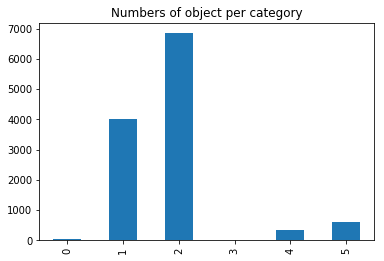

In [20]:
# Plot numbers of object per category
object_frequencies = df1['object_type'].value_counts(sort=False)
object_frequencies.plot.bar(title='Numbers of object per category')

* Annotation file has noise or missing labels. In documentation, author only lists label for object_type from 1->5

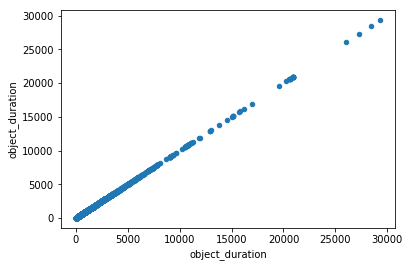

In [21]:
df1.plot(kind='scatter', x='object_duration', y='object_duration')